<a href="https://colab.research.google.com/github/Harshu1707/Data-Cleaning-Preprocessing-AIML/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving breast-cancer.csv to breast-cancer (3).csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se     

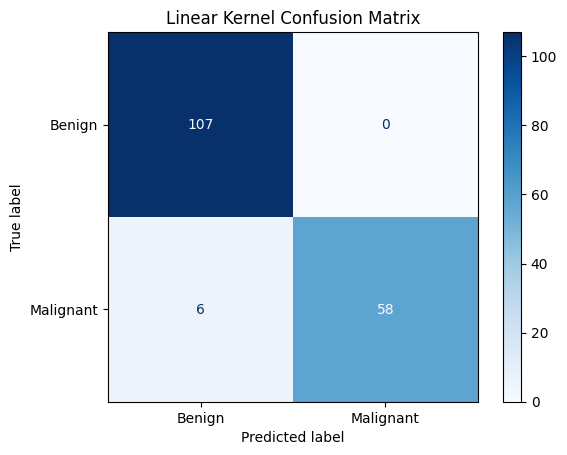


Confusion Matrix (RBF Kernel):


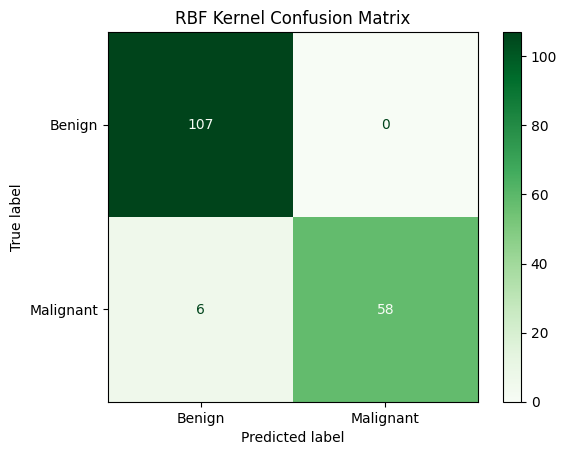

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters from Grid Search: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9697784810126582

Cross-Validation Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.98230088]
Mean CV Accuracy: 0.9771619313771154


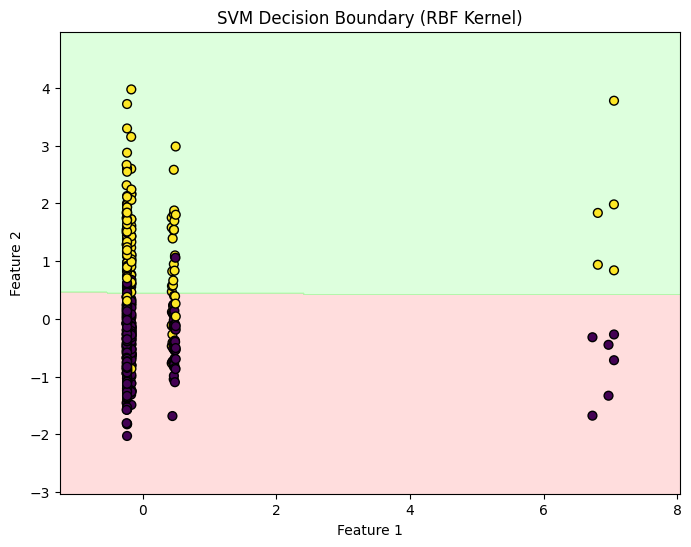

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

print("\nDataset Info:")
print(data.info())

print("\nFirst 5 Rows:")
print(data.head())

target_col = 'diagnosis' if 'diagnosis' in data.columns else data.columns[1]

le = LabelEncoder()
data[target_col] = le.fit_transform(data[target_col])

X = data.drop(columns=[target_col])
y = data[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nLinear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

print("\nConfusion Matrix (Linear Kernel):")
cm_linear = confusion_matrix(y_test, y_pred_linear)
ConfusionMatrixDisplay(cm_linear, display_labels=['Benign', 'Malignant']).plot(cmap='Blues')
plt.title("Linear Kernel Confusion Matrix")
plt.show()

print("\nConfusion Matrix (RBF Kernel):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
ConfusionMatrixDisplay(cm_rbf, display_labels=['Benign', 'Malignant']).plot(cmap='Greens')
plt.title("RBF Kernel Confusion Matrix")
plt.show()

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

svm_best = grid.best_estimator_
cv_scores = cross_val_score(svm_best, X_scaled, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
X_vis = X_scaled[:, :2]
y_vis = y.values

svm_viz = SVC(kernel='rbf', C=grid.best_params_['C'],
              gamma=grid.best_params_['gamma'])
svm_viz.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', s=40)
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
